# Data Visualization Project

Purpose of the presentation:
What is the overall happiness in the world?

Sub-questions to answer the main question:
- What are the most and least important factors that contribute to the happiness of a country?


In [156]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

## 1 Data Preparation

In [157]:
# Load data
data2015 = pd.read_csv(os.path.join('data', '2015.csv'))
data2016 = pd.read_csv(os.path.join('data', '2016.csv'))
data2017 = pd.read_csv(os.path.join('data', '2017.csv'))
data2018 = pd.read_csv(os.path.join('data', '2018.csv'))
data2019 = pd.read_csv(os.path.join('data', '2019.csv'))
data2020 = pd.read_csv(os.path.join('data', '2020.csv'))
data2021 = pd.read_csv(os.path.join('data', '2021.csv'))
data2022 = pd.read_csv(os.path.join('data', '2022.csv'))

In [158]:
years = list(range(2015, 2023))
all_data = [data2015, data2016, data2017, data2018, data2019, data2020, data2021, data2022]

In [159]:
for i, data in enumerate(all_data):
    print(f'{years[i]} ({len(data.columns)}): {data.columns}\n')

2015 (12): Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

2016 (13): Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

2017 (12): Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

2018 (9): Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social su

Pas le même nombre de colonnes, ni les mêmes noms. Donc on va transformer les colonnes de chaque année dans un même format.

### 1.1 Preprocessing each data into same format columns


We keep the following columns:

- Happiness Rank : Rank of the country based on the Happiness Score. => osef on pet le faire nous meme 
- Country : Name of the country => ok partout
- Region : Region the country belongs to => pas partout mais du coup on va garder que europe
- Happiness score : A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest." => ok partout
- Economy (GDP per Capita) : The extent to which GDP contributes to the calculation of the Happiness Score. =>
- Family : The extent to which Family contributes to the calculation of the Happiness Score => 
- Health (Life Expectancy) : The extent to which Life expectancy contributed to the calculation of the Happiness Score =>
- Freedom : The extent to which Freedom contributed to the calculation of the Happiness Score. =>
- Trust (Government Corruption) : The extent to which Perception of Corruption contributes to Happiness Score.
- Generosity : The extent to which Generosity contributed to the calculation of the Happiness Score. 
- Dystopia Residual : The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

And add a 'year' column


In [160]:
data2015 = data2015.rename(columns = {'Happiness Rank': 'happiness_rank',
                                      'Country': 'country',
                                      'Region': 'region',
                                      'Happiness Score': 'happiness_score',
                                      'Economy (GDP per Capita)': 'economy',
                                      'Family': 'social_support',
                                      'Health (Life Expectancy)': 'health',
                                      'Freedom': 'freedom',
                                      'Trust (Government Corruption)': 'trust',
                                      'Generosity': 'generosity',
                                      'Dystopia Residual': 'dystopia_residual'})

data2016 = data2016.rename(columns = {'Happiness Rank': 'happiness_rank',
                                      'Country': 'country',
                                      'Region': 'region',
                                      'Happiness Score': 'happiness_score',
                                      'Economy (GDP per Capita)': 'economy',
                                      'Family': 'social_support',
                                      'Health (Life Expectancy)': 'health',
                                      'Freedom': 'freedom',
                                      'Trust (Government Corruption)': 'trust',
                                      'Generosity': 'generosity',
                                      'Dystopia Residual': 'dystopia_residual'})

data2017 = data2017.rename(columns = {'Happiness.Rank': 'happiness_rank',
                                      'Country': 'country',
                                      'Happiness.Score': 'happiness_score',
                                      'Economy..GDP.per.Capita.': 'economy',
                                      'Family': 'social_support',
                                      'Health..Life.Expectancy.': 'health',
                                      'Freedom': 'freedom',
                                      'Trust..Government.Corruption.': 'trust',
                                      'Generosity': 'generosity',
                                      'Dystopia.Residual': 'dystopia_residual'})
data2017['region'] = np.nan

data2018 = data2018.rename(columns = {'Overall rank': 'happiness_rank',
                                      'Country or region': 'country',
                                      'Score': 'happiness_score',
                                      'GDP per capita': 'economy',
                                      'Social support': 'social_support',
                                      'Healthy life expectancy': 'health',
                                      'Freedom to make life choices': 'freedom',
                                      'Perceptions of corruption': 'trust',
                                      'Generosity': 'generosity'})
data2018['region'] = np.nan
data2018['dystopia_residual'] = np.nan

data2019 = data2019.rename(columns = {'Overall rank': 'happiness_rank',
                                      'Country or region': 'country',
                                      'Score': 'happiness_score',
                                      'GDP per capita': 'economy',
                                      'Social support': 'social_support',
                                      'Healthy life expectancy': 'health',
                                      'Freedom to make life choices': 'freedom',
                                      'Perceptions of corruption': 'trust',
                                      'Generosity': 'generosity'})
data2019['region'] = np.nan
data2019['dystopia_residual'] = np.nan

data2020 = data2020.rename(columns = {'Country name': 'country',
                                      'Regional indicator': 'region',
                                      'Ladder score': 'happiness_score',
                                      'Explained by: Log GDP per capita': 'economy',
                                      'Explained by: Social support': 'social_support',
                                      'Explained by: Healthy life expectancy': 'health',
                                      'Explained by: Freedom to make life choices': 'freedom',
                                      'Explained by: Perceptions of corruption': 'trust',
                                      'Explained by: Generosity': 'generosity',
                                      'Dystopia + residual': 'dystopia_residual'})
data2020['happiness_rank'] = np.nan

data2021 = data2021.rename(columns = {'Country name': 'country',
                                      'Regional indicator': 'region',
                                      'Ladder score': 'happiness_score',
                                      'Explained by: Log GDP per capita': 'economy',
                                      'Explained by: Social support': 'social_support',
                                      'Explained by: Healthy life expectancy': 'health',
                                      'Explained by: Freedom to make life choices': 'freedom',
                                      'Explained by: Perceptions of corruption': 'trust',
                                      'Explained by: Generosity': 'generosity',
                                      'Dystopia + residual': 'dystopia_residual'})
data2021['happiness_rank'] = np.nan

data2022 = data2022.rename(columns = {'RANK': 'happiness_rank',
                                      'Country': 'country',
                                      'Happiness score': 'happiness_score',
                                      'Explained by: GDP per capita': 'economy',
                                      'Explained by: Social support': 'social_support',
                                      'Explained by: Healthy life expectancy': 'health',
                                      'Explained by: Freedom to make life choices': 'freedom',
                                      'Explained by: Perceptions of corruption': 'trust',
                                      'Explained by: Generosity': 'generosity',
                                      'Dystopia (1.83) + residual': 'dystopia_residual'})  

data2022['region'] = np.nan                                                                                                                                                     

In [161]:
# Add a 'year' column
data2015['year'] = 2015
data2016['year'] = 2016
data2017['year'] = 2017
data2018['year'] = 2018
data2019['year'] = 2019
data2020['year'] = 2020
data2021['year'] = 2021
data2022['year'] = 2022

### 1.2 Store data from 2015 - 2022 into a new data frame

In [162]:
columns = ['happiness_rank', 'country', 'region', 'happiness_score', 'economy', 'social_support', 'health', 'freedom', 'trust', 'generosity', 'dystopia_residual', 'year']

In [163]:
all_data = [data2015, data2016, data2017, data2018, data2019, data2020, data2021, data2022]
happiness_df = pd.DataFrame(columns=columns)

In [164]:
all_data = [data2015, data2016, data2017, data2018, data2019, data2020, data2021, data2022]
happiness_df = pd.DataFrame(columns=columns)
for data in all_data:
    data['happiness_rank'] = data['happiness_score'].rank(ascending = 0)

In [165]:
for data in all_data:
    happiness_df = happiness_df.append(data[columns], ignore_index='True')

/tmp/ipykernel_324637/4058082190.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  happiness_df = happiness_df.append(data[columns], ignore_index='True')
/tmp/ipykernel_324637/4058082190.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  happiness_df = happiness_df.append(data[columns], ignore_index='True')
/tmp/ipykernel_324637/4058082190.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  happiness_df = happiness_df.append(data[columns], ignore_index='True')
/tmp/ipykernel_324637/4058082190.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  happiness_df = happiness_df.append(data[columns], ignore_index='True')
/tmp/ipykernel_32463

In [166]:
happiness_df = happiness_df[happiness_df['happiness_score'].notna()]

### 1.3 Convert to correct dtypes

In [167]:
happiness_df.dtypes

happiness_rank       object
country              object
region               object
happiness_score      object
economy              object
social_support       object
health               object
freedom              object
trust                object
generosity           object
dystopia_residual    object
year                 object
dtype: object

In [168]:
# Some float values had , instead of . and so could not be converted from 'object' to 'float32'
# We replace , to .
happiness_df = happiness_df.replace(',', '.', regex=True)

In [169]:
happiness_df['happiness_rank'] = happiness_df['happiness_rank'].apply(np.int32)

In [170]:
happiness_df = happiness_df.astype({'happiness_rank': 'Int32',
                                    'country': 'string',
                                    'region': 'string',
                                    'happiness_score': 'float32', 
                                    'economy': 'float32',
                                    'social_support': 'float32', 
                                    'health': 'float32',
                                    'freedom': 'float32',
                                    'trust': 'float32',
                                    'generosity': 'float32',
                                    'dystopia_residual': 'float32',
                                    'year': 'int32'})


In [171]:
happiness_df

,happiness_rank,country,region,happiness_score,economy,social_support,health,freedom,trust,generosity,dystopia_residual,year
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1225,142,Botswana*,<NA>,3.471,1.50300,0.81500,0.28000,0.57100,0.10200,0.01200,0.18700,2022
1226,143,Rwanda*,<NA>,3.268,0.78500,0.13300,0.46200,0.62100,0.54400,0.18700,0.53600,2022
1227,144,Zimbabwe,<NA>,2.995,0.94700,0.69000,0.27000,0.32900,0.10500,0.10600,0.54800,2022
1228,145,Lebanon,<NA>,2.955,1.39200,0.49800,0.63100,0.10300,0.03400,0.08200,0.21600,2022


In [172]:
happiness_df.to_pickle('happiness_df') # save
#df = pd.read_pickle(file_name) # load

### 1.4 Look for abnormal values if any

In [173]:
happiness_df.describe()

,happiness_rank,happiness_score,economy,social_support,health,freedom,trust,generosity,dystopia_residual,year
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1229.000000,1230.000000,918.000000,1230.000000
mean,77.410569,5.430096,0.976255,1.032986,0.608133,0.440833,0.130756,0.201583,2.085951,2018.447154
std,44.486782,1.115360,0.435247,0.329526,0.241249,0.154415,0.110818,0.115522,0.583109,2.282716
min,1.000000,2.404000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187000,2015.000000
25%,39.000000,4.584500,0.668250,0.824771,0.439250,0.344250,0.056000,0.118000,1.730570,2016.000000
50%,77.000000,5.410500,1.013580,1.069168,0.639427,0.458135,0.096000,0.186984,2.107560,2018.000000
75%,116.000000,6.226225,1.295961,1.273395,0.790795,0.559000,0.164000,0.258494,2.465602,2020.000000
max,158.000000,7.842000,2.209000,1.644000,1.141000,0.740000,0.587000,0.838075,3.837720,2022.000000


<AxesSubplot:>

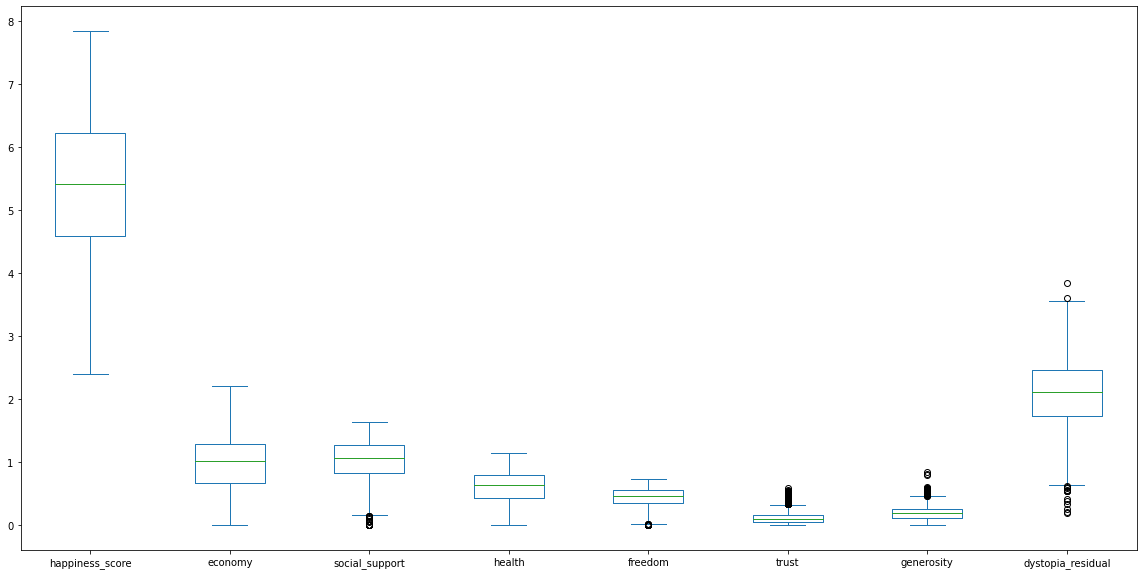

In [174]:
happiness_df.select_dtypes(include=['float32']).plot(kind="box", figsize=(20,10))

No outliers.

In [175]:
region = ['Central and Eastern Europe','Western Europe']

In [176]:
country_list = happiness_df[happiness_df['region'].isin(region)].country.unique()

In [177]:
len(country_list)

51

In [198]:
country_list

<StringArray>
[           'Switzerland',                'Iceland',                'Denmark',
                 'Norway',                'Finland',            'Netherlands',
                 'Sweden',                'Austria',             'Luxembourg',
                'Ireland',                'Belgium',         'United Kingdom',
                'Germany',                 'France',         'Czech Republic',
                  'Spain',                  'Malta',             'Uzbekistan',
               'Slovakia',                  'Italy',                'Moldova',
             'Kazakhstan',               'Slovenia',              'Lithuania',
                'Belarus',                 'Poland',                'Croatia',
                 'Russia',           'North Cyprus',                 'Cyprus',
                 'Kosovo',           'Turkmenistan',                'Estonia',
             'Kyrgyzstan',             'Azerbaijan',             'Montenegro',
                'Romania',            

In [242]:
countries_of_interest = ['Finland', 'Denmark', 'Norway', 'Sweden', 'France']

In [243]:
df_europe = happiness_df[happiness_df['country'].isin(country_list)]

In [244]:
df_europe

,happiness_rank,country,region,happiness_score,economy,social_support,health,freedom,trust,generosity,dystopia_residual,year
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
5,6,Finland,Western Europe,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1168,85,Bulgaria,<NA>,5.371,1.62500,1.16300,0.64000,0.56300,0.02100,0.12300,1.23500,2022
1172,89,North Macedonia,<NA>,5.199,1.50500,0.86300,0.63700,0.48800,0.03100,0.21500,1.46100,2022
1173,89,Albania,<NA>,5.199,1.43900,0.64600,0.71900,0.51100,0.02800,0.13800,1.71800,2022
1181,98,Ukraine,<NA>,5.084,1.41100,1.08100,0.58300,0.47300,0.01700,0.18800,1.33100,2022


In [245]:
year = 2015

In [246]:
df_filtered = df_europe[df_europe['year']==2015]

In [247]:
df_europe[df_europe['country']=='France']

,happiness_rank,country,region,happiness_score,economy,social_support,health,freedom,trust,generosity,dystopia_residual,year
28,29,France,Western Europe,6.5750,1.277780,1.260380,0.945790,0.550110,0.206460,0.123320,2.211260,2015
189,32,France,Western Europe,6.4780,1.394880,1.005080,0.837950,0.465620,0.178080,0.121600,2.474400,2016
345,31,France,<NA>,6.4420,1.430923,1.387777,0.844466,0.470222,0.172502,0.129762,2.005955,2017
492,23,France,<NA>,6.4890,1.293000,1.466000,0.908000,0.520000,0.176000,0.098000,NaN,2018
649,24,France,<NA>,6.5920,1.324000,1.472000,1.045000,0.436000,0.183000,0.111000,NaN,2019
804,23,France,Western Europe,6.6638,1.268129,1.458839,1.029714,0.514051,0.227303,0.112608,2.053198,2020
955,21,France,Western Europe,6.6900,1.421000,1.081000,0.804000,0.536000,0.235000,0.092000,2.521000,2021
1103,20,France,<NA>,6.6870,1.863000,1.219000,0.808000,0.567000,0.266000,0.070000,1.895000,2022


In [248]:
df_filtered

,happiness_rank,country,region,happiness_score,economy,social_support,health,freedom,trust,generosity,dystopia_residual,year
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
5,6,Finland,Western Europe,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
6,7,Netherlands,Western Europe,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015
7,8,Sweden,Western Europe,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015
12,13,Austria,Western Europe,7.200,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320,2015
16,17,Luxembourg,Western Europe,6.946,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034,1.96961,2015
17,18,Ireland,Western Europe,6.940,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901,1.97570,2015


In [270]:
def plot_map(df_filtered):
    hover_data = df_filtered[["happiness_rank","happiness_score"]]

    fig = px.choropleth(df_filtered,
                        locations=df_filtered["country"],
                        locationmode="country names",
                        projection="natural earth",
                        hover_data=hover_data,
                        hover_name=df_filtered["country"],
                        color="happiness_rank",
                        color_continuous_scale=px.colors.sequential.RdBu[::-1],
                        scope="europe")
    fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

In [271]:
plot_map(df_filtered)

In [251]:
df_interest = df_europe[df_europe['country'].isin(countries_of_interest)]

In [252]:
def plot_top(df):
    fig = px.line(df, x='year', y='happiness_rank', color='country')
    fig['layout']['yaxis']['autorange'] = "reversed"
    #fig.update_yaxes(range=[40, 1])
    fig.show()

In [253]:
plot_top(df_interest)

In [259]:
df_interest = df_interest.sort_values('happiness_score', ascending=False)

In [261]:
df_interest

,happiness_rank,country,region,happiness_score,economy,social_support,health,freedom,trust,generosity,dystopia_residual,year
935,1,Finland,Western Europe,7.8420,1.446000,1.106000,0.741000,0.691000,0.481000,0.124000,3.253000,2021
1084,1,Finland,<NA>,7.8210,1.892000,1.258000,0.775000,0.736000,0.534000,0.109000,2.518000,2022
782,1,Finland,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.477857,0.159670,2.762835,2020
626,1,Finland,<NA>,7.7690,1.340000,1.587000,0.986000,0.596000,0.393000,0.153000,NaN,2019
783,2,Denmark,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.495260,0.242793,2.432741,2020
1085,2,Denmark,<NA>,7.6360,1.953000,1.243000,0.777000,0.719000,0.532000,0.188000,2.226000,2022
470,1,Finland,<NA>,7.6320,1.305000,1.592000,0.874000,0.681000,0.393000,0.202000,NaN,2018
936,2,Denmark,Western Europe,7.6200,1.502000,1.108000,0.763000,0.686000,0.485000,0.208000,2.868000,2021
627,2,Denmark,<NA>,7.6000,1.383000,1.573000,0.996000,0.592000,0.410000,0.252000,NaN,2019
471,2,Norway,<NA>,7.5940,1.456000,1.582000,0.861000,0.686000,0.340000,0.286000,NaN,2018


In [306]:
def plot_score(df_interest):

    fig = px.box(df_interest,
                 x="happiness_score",
                 y="country",
                 color="country",
                 color_discrete_sequence=px.colors.qualitative.Pastel_r,
                 points='all')
    fig.update_traces(boxmean=True,
                      whiskerwidth=0.8,
                      marker_size=7,
                line_width=2.5
                      )
    fig.update_layout(height=600,
                      width=800,
                      showlegend=True,
                      yaxis= dict(showticklabels = False),
                      title="Distribution of happiness score by region")
    fig.show()


In [307]:
plot_score(df_interest)

In [336]:
happiness_df

,happiness_rank,country,region,happiness_score,economy,social_support,health,freedom,trust,generosity,dystopia_residual,year
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1225,142,Botswana*,<NA>,3.471,1.50300,0.81500,0.28000,0.57100,0.10200,0.01200,0.18700,2022
1226,143,Rwanda*,<NA>,3.268,0.78500,0.13300,0.46200,0.62100,0.54400,0.18700,0.53600,2022
1227,144,Zimbabwe,<NA>,2.995,0.94700,0.69000,0.27000,0.32900,0.10500,0.10600,0.54800,2022
1228,145,Lebanon,<NA>,2.955,1.39200,0.49800,0.63100,0.10300,0.03400,0.08200,0.21600,2022


In [337]:
temp = happiness_df[['happiness_score','economy', 'health','social_support','freedom','dystopia_residual','generosity']]

In [341]:
corr = temp.corr()

In [353]:
def plot_heat_corr(corr):
fig = go.Figure(data=go.Heatmap(
    x=corr.columns,
    y=corr.columns,
    z=corr,
    colorscale=px.colors.diverging.Spectral,
    zmin=-1,
    zmax=1
))
fig.show()

In [354]:
happiness_df

,happiness_rank,country,region,happiness_score,economy,social_support,health,freedom,trust,generosity,dystopia_residual,year
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1225,142,Botswana*,<NA>,3.471,1.50300,0.81500,0.28000,0.57100,0.10200,0.01200,0.18700,2022
1226,143,Rwanda*,<NA>,3.268,0.78500,0.13300,0.46200,0.62100,0.54400,0.18700,0.53600,2022
1227,144,Zimbabwe,<NA>,2.995,0.94700,0.69000,0.27000,0.32900,0.10500,0.10600,0.54800,2022
1228,145,Lebanon,<NA>,2.955,1.39200,0.49800,0.63100,0.10300,0.03400,0.08200,0.21600,2022


In [356]:
pip install bubbly

  Preparing metadata (setup.py) ... done
  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5433 sha256=406c914639fce2bcd81898cf065425586357ad8e819d5744279437bad3040d59
  Stored in directory: /home/mathildedacruz/.cache/pip/wheels/f7/b8/85/5fdfe7bcc88b1579581f046004f953b05c9ca7387fb373cf2d
Successfully built bubbly
Note: you may need to restart the kernel to use updated packages.


In [358]:


from bubbly.bubbly import bubbleplot 

figure = bubbleplot(dataset=happiness_df, x_column='economy', y_column='health', 
    bubble_column='happiness_rank', time_column='social_support', size_column='freedom', color_column='happiness_score', 
    x_title="economy", y_title="health", title='Gapminder Global Indicators',
    x_logscale=True, scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})



/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/mathildedacruz/anaconda3/envs/tippex/lib/python3.9/site-packages/bubbly/bubbly.py:

NameError: name 'iplot' is not defined

In [360]:
plot(figure)

NameError: name 'plot' is not defined

In [ ]:
scatter3D(Happiness$Freedom, Happiness$Life.Expectancy, Happiness$Happiness.Score, phi = 0, bty = "g",
          pch = 20, cex = 2, ticktype = "detailed",
          main = "Happiness data", xlab = "Freedom",
          ylab ="Life.Expectancy", zlab = "Happiness.Score")